In [1]:
from core.layer import *
from core.voiceHandler import make_batch
from tensorflow.keras import Sequential
import tensorflow as tf
from IPython.display import Audio
inputs,targets = make_batch('data/voice.wav')
inputs.shape

(1, 89375, 1)

In [2]:
Audio(inputs.reshape(inputs.shape[1]), rate=44100)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
model = generate_model((inputs.shape[1],inputs.shape[-1]))
model.summary()

Model: "my_wavenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 89375, 1)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 89375, 32)    128         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 89375, 32)    3104        conv1d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_Sigmoid (TensorFlow [(None, 89375, 32)]  0           conv1d_1[0][0]                   
_________________________________________________________________________________________

In [5]:
def cost(y,y_pred):
    costs = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=y_pred)
    cost = tf.reduce_mean(costs)
    return cost

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=cost,optimizer= opt) 

In [11]:
model.fit(inputs,targets,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 103ms/step - loss: 0.3033
Epoch 2/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3029
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3025
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3022
Epoch 5/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3018
Epoch 6/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3014
Epoch 7/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3011
Epoch 8/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3007
Epoch 9/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3004
Epoch 10/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3000
Epoch 11/100
1/1 [==============================] - 0s 95ms/step - loss: 0.2997
Epoch 12/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2993
Epoch 13/100
1/1 [==============================

In [12]:
pred = []
a = model.predict(inputs)
for id_ in a[0]:
    pred.append(np.argmax(id_))

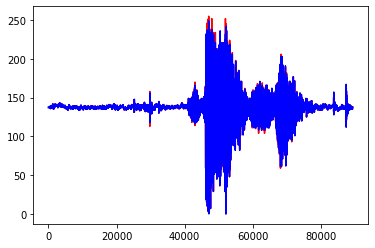

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(targets[0] , color='r', label='Real');
plt.plot(pred , color='b', label='Predictions');

In [14]:
p_decode = np.array(pred).reshape(1,-1)
bins = np.linspace(-1, 1, 256)
p_decode =  bins[p_decode].reshape(1, -1, 1)

In [15]:
Audio(p_decode.reshape(p_decode.shape[1]), rate=44100)